In [12]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1451   | 7.886     | 5.569     | 4.194     |
| 3         | -0.1377   | 6.325     | 3.235     | 0.3878    |
| 6         | -0.1293   | 3.159     | 5.176     | 6.143     |
| 9         | -0.1028   | 1.031     | 4.775     | 7.773     |
| 10        | -0.09047  | 0.4399    | 8.015     | 7.124     |
| 22        | -0.02203  | 1.134     | 8.379     | 0.3493    |
| 47        | -0.01431  | 1.078     | 8.462     | 0.3353    |
Curve params found
{'push': 1.0784788352550478,
 'shift': 8.461907102757987,
 'slope': 0.33531197779478455}
-
## Chance of nonscaling delay ##


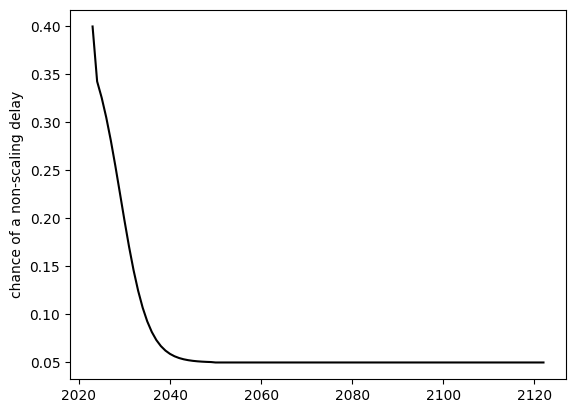

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 34%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2033

In [13]:
nonscaling_points = [(2023, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3283   | 9.369     | 5.551     | 3.405     |
| 3         | -0.2429   | 1.473     | 3.465     | 7.776     |
| 8         | -0.1797   | 0.6503    | 9.971     | 7.154     |
| 11        | -0.1652   | 2.541     | 9.907     | 0.6466    |
| 42        | -0.06132  | 0.08141   | 9.796     | 2.411     |
| 50        | -0.05079  | 0.5648    | 9.671     | 1.197     |
| 86        | -0.0453   | 0.1035    | 6.22      | 1.809     |
| 118       | -0.03752  | 0.824     | 8.734     | 0.6496    |
Curve params found
{'push': 0.8240034389401566,
 'shift': 8.733552225023574,
 'slope': 0.6496418722098226}
-
## Chance of nonscaling delay ##


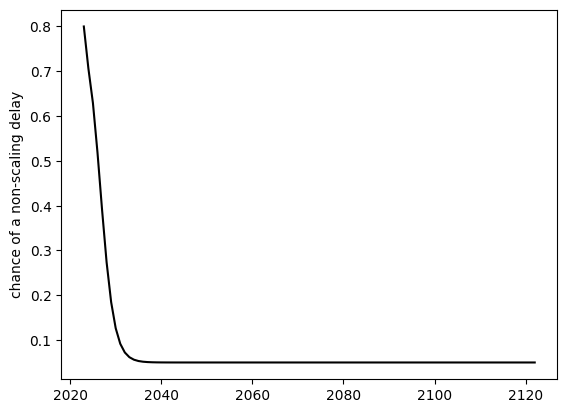

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 71%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 52%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2033 -

In [14]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2023, 0.8),
                     (2025, 0.6),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.3      | 7.445     | 6.528     | 5.654     |
| 4         | -0.2999   | 8.021     | 4.637     | 3.581     |
| 6         | -0.2182   | 6.653     | 8.184     | 0.2515    |
| 25        | -0.1464   | 0.4241    | 6.13      | 0.9783    |
| 36        | -0.00445  | 0.1282    | 4.976     | 0.7537    |
Curve params found
{'push': 0.1281693078981366,
 'shift': 4.975619595922379,
 'slope': 0.7536801253525669}
-
## Chance of nonscaling delay ##


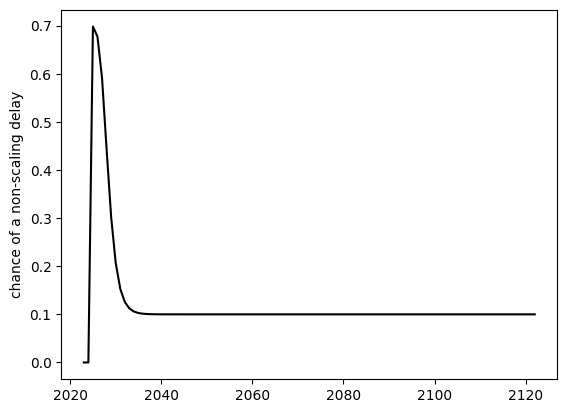

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 44%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2033 -

In [15]:
nonscaling_points = {'points': [(2025, 0.7),
                                (2027, 0.6),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 42        | -0.05     | 0.01      | 4.064     | 8.176     |
| 49        | -0.02892  | 0.08422   | 0.4813    | 0.3735    |
| 55        | -0.01558  | 0.01      | 0.5669    | 0.568     |
Curve params found
{'push': 0.01, 'shift': 0.5668518500082329, 'slope': 0.5679840739249596}
-
## Chance of nonscaling delay ##


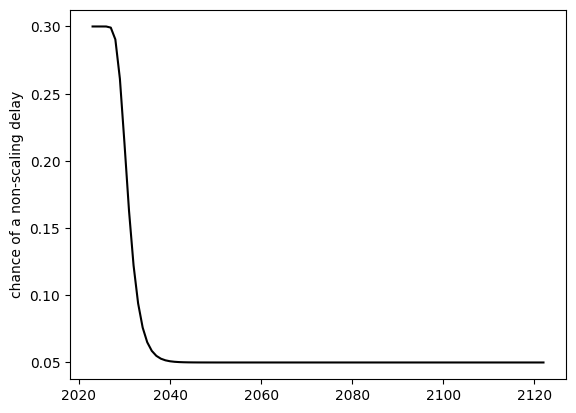

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2033

In [16]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.05     | 0.07036   | 8.892     | 8.459     |
| 3         | -0.05     | 0.04664   | 8.465     | 4.578     |
| 7         | -0.05     | 0.02903   | 6.219     | 3.832     |
| 43        | -0.04983  | 0.01      | 9.5       | 1.82      |
| 87        | -0.04968  | 0.03657   | 8.122     | 1.526     |
Curve params found
{'push': 0.036566272882392545,
 'shift': 8.1218400441676,
 'slope': 1.5261978927415711}
-
## Chance of nonscaling delay ##


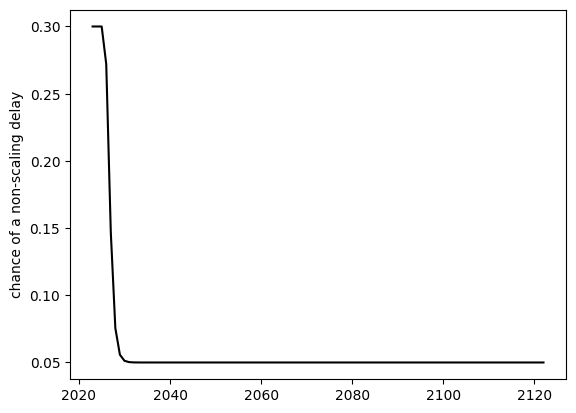

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - ch

In [17]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.01372  | 1.125     | 8.15      | 9.453     |
| 5         | -0.01005  | 0.3488    | 7.749     | 3.901     |
| 16        | -0.01     | 0.01284   | 6.306     | 7.058     |
| 41        | -0.01     | 0.01      | 10.0      | 5.469     |
| 46        | -0.009983 | 0.01      | 10.0      | 2.036     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 2.035734352483896}
-
## Chance of nonscaling delay ##


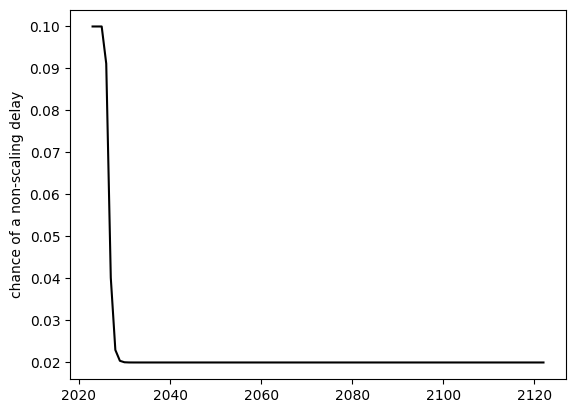

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 4%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - chan

In [18]:
nonscaling_points = [(2023, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

In [19]:
"""
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.2),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))
"""

"\nnonscaling_points = [(2023, 0.3),\n                     (2030, 0.2),\n                     (2050, 0.2),\n                     (2080, 0.2)]\np_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)\ndelays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],\n                                                                            [0.1, sq.lognorm(10, 100)]])}\nplot_nonscaling_delay(plt, years, p_nonscaling_delay)\nprint('-')\npprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))\n"

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 8         | -0.1622   | 2.573     | 9.723     | 1.637     |
| 11        | -0.1231   | 0.5266    | 2.668     | 6.294     |
| 20        | -0.1132   | 0.4346    | 8.628     | 6.022     |
| 41        | -0.1125   | 0.01      | 5.236     | 6.869     |
| 42        | -0.1125   | 0.01      | 7.228     | 3.078     |
| 50        | -0.08734  | 0.01      | 2.313     | 0.4521    |
| 69        | -0.08684  | 0.03186   | 3.246     | 0.3943    |
| 84        | -0.04014  | 0.2137    | 3.27      | 0.3792    |
Curve params found
{'push': 0.21368250406650072,
 'shift': 3.26977064557143,
 'slope': 0.37915290466987406}
-
## Chance of nonscaling delay ##


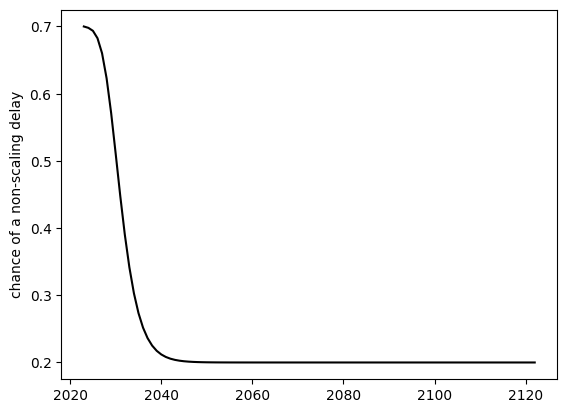

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 45%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 39%
Year: 2033

In [20]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2023, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [21]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [22]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-10-02 17:51:00.895772
